In [29]:

# =======================
# 1. Setup & Imports
# =======================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

from dataset_loader import load_dataset, split_dataset
from preprocessing import preprocess_data
from kalman_filter import apply_kalman_filter
from ml_models import get_model, reshape_for_rnn

from sklearn.model_selection import train_test_split

import tensorflow as tf

In [30]:
# =======================
# 2. Load dataset
# =======================
dataset_path = "IMU.csv"  # replace with your dataset path
df = load_dataset(dataset_path)

# Extract features and labels
X_train, X_test, y_train, y_test = split_dataset(df)

# Preprocess
X_train_prep, X_test_prep, scaler = preprocess_data(X_train, X_test)

# Apply Kalman filtering to GPS labels (optional, smoothing ground truth)
filtered_positions = apply_kalman_filter(df)

In [31]:
# =======================
# 3. Helper: Evaluation
# =======================
def evaluate_model(y_true, y_pred, model_name):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n📊 {model_name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE : {mae:.4f}")
    print(f"R²  : {r2:.4f}")

    return {"model": model_name, "RMSE": rmse, "MAE": mae, "R2": r2}


def plot_trajectory(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.plot(y_true[:,0], y_true[:,1], label="Real GPS", marker="o", markersize=2)
    plt.plot(y_pred[:,0], y_pred[:,1], label="Predicted GPS", marker="x", markersize=2)
    plt.title(f"Trajectory Comparison - {model_name}")
    plt.xlabel("Latitude")
    plt.ylabel("Longitude")
    plt.legend()
    plt.show()

In [32]:
# =======================
# 4. Train & Compare Models
# =======================
results = []

In [33]:
# --- RNN-based models need sequences ---
timesteps = 10
X_train_seq = reshape_for_rnn(X_train_prep, timesteps=timesteps)
X_test_seq = reshape_for_rnn(X_test_prep, timesteps=timesteps)
y_train_seq = y_train[timesteps:]
y_test_seq = y_test[timesteps:]

input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])

Epoch 1/50


c:\Users\G15\Desktop\coding\.conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2586.4138
Epoch 2/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1706.9558
Epoch 3/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1266.3361
Epoch 4/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 926.4224
Epoch 5/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 661.3467
Epoch 6/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 457.9950
Epoch 7/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 305.8643
Epoch 8/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 195.6472
Epoch 9/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 118.9138
Epoch 10/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 68.0393
Epoch 11/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 36.2545
Epoch 12/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 17.7686
Epoch 13/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 7.8987
Epoch 14/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3.1349
Epoch 15/50
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 

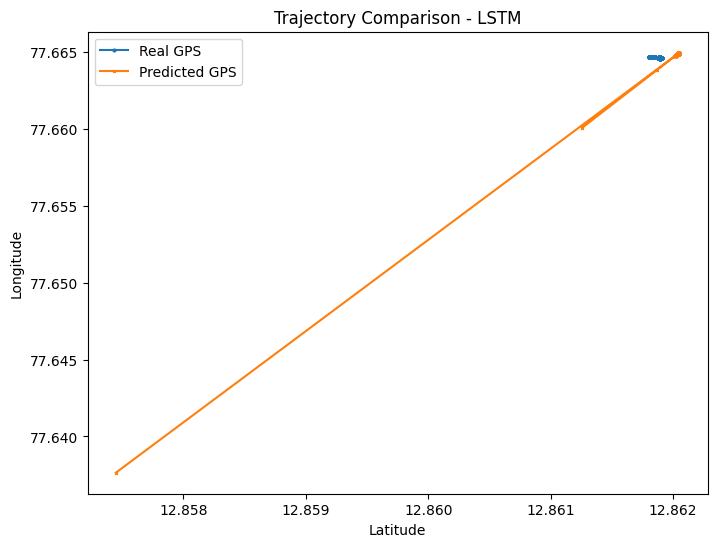

In [34]:
# --------------------
# LSTM
# --------------------
lstm = get_model("lstm", input_shape)
lstm.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32, verbose=1)
y_pred = lstm.predict(X_test_seq)
results.append(evaluate_model(y_test_seq, y_pred, "LSTM"))
plot_trajectory(y_test_seq, y_pred, "LSTM")

Epoch 1/5


c:\Users\G15\Desktop\coding\.conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1688.6923
Epoch 2/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0252
Epoch 3/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0239
Epoch 4/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0223
Epoch 5/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0216
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

📊 CNN+LSTM Performance:
RMSE: 0.1598
MAE : 0.1203
R²  : -17935194.7984


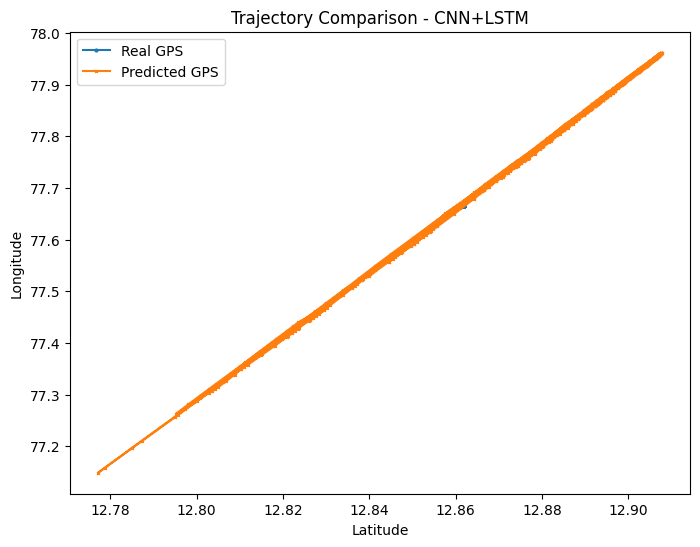

In [35]:
# --------------------
# CNN + LSTM
# --------------------
cnn_lstm = get_model("cnn_lstm", input_shape)
cnn_lstm.fit(X_train_seq, y_train_seq, epochs=5, batch_size=32, verbose=1)
y_pred = cnn_lstm.predict(X_test_seq)
results.append(evaluate_model(y_test_seq, y_pred, "CNN+LSTM"))
plot_trajectory(y_test_seq, y_pred, "CNN+LSTM")


Epoch 1/5


c:\Users\G15\Desktop\coding\.conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


258/258 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2630.7544
Epoch 2/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1828.1090
Epoch 3/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1376.7100
Epoch 4/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1020.7704
Epoch 5/5
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 739.4487
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

📊 LSTM+GRU Performance:
RMSE: 23.8492
MAE : 16.8640
R²  : -397790892398.2798


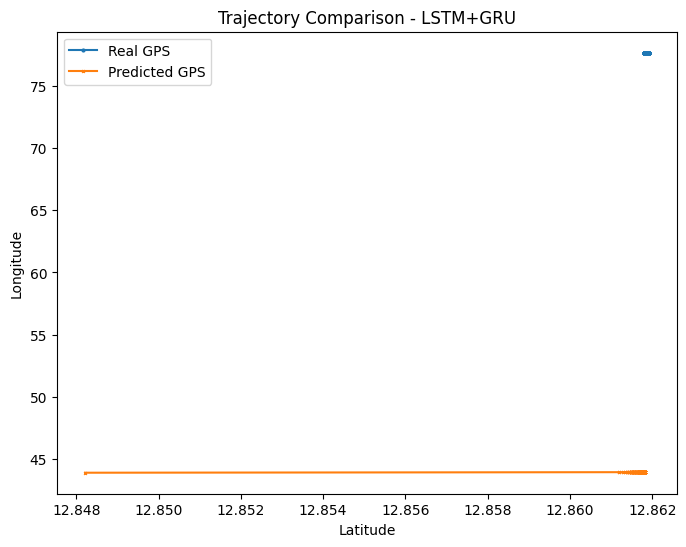

In [36]:
# --------------------
# LSTM + GRU
# --------------------
lstm_gru = get_model("lstm+gru", input_shape)
lstm_gru.fit(X_train_seq, y_train_seq, epochs=5, batch_size=32, verbose=1)
y_pred = lstm_gru.predict(X_test_seq)
results.append(evaluate_model(y_test_seq, y_pred, "LSTM+GRU"))
plot_trajectory(y_test_seq, y_pred, "LSTM+GRU")



📊 SVR Performance:
RMSE: 0.0000
MAE : 0.0000
R²  : -0.5157


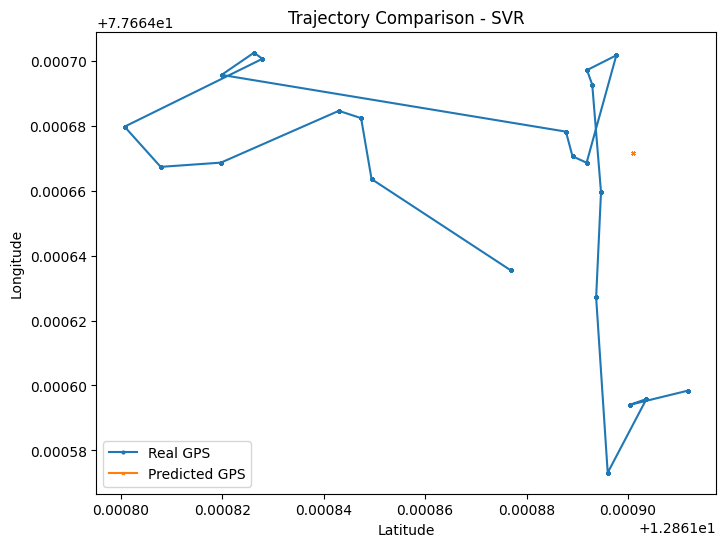

In [37]:
# --------------------
# SVR (needs flatten input)
# --------------------
svr = get_model("svr")
svr.fit(X_train_prep, y_train[:,0])  # Fit latitude
y_pred_lat = svr.predict(X_test_prep)
svr.fit(X_train_prep, y_train[:,1])  # Fit longitude
y_pred_lon = svr.predict(X_test_prep)
y_pred = np.vstack((y_pred_lat, y_pred_lon)).T
results.append(evaluate_model(y_test, y_pred, "SVR"))
plot_trajectory(y_test, y_pred, "SVR")



📊 Random Forest Performance:
RMSE: 0.0001
MAE : 0.0000
R²  : -1.3568


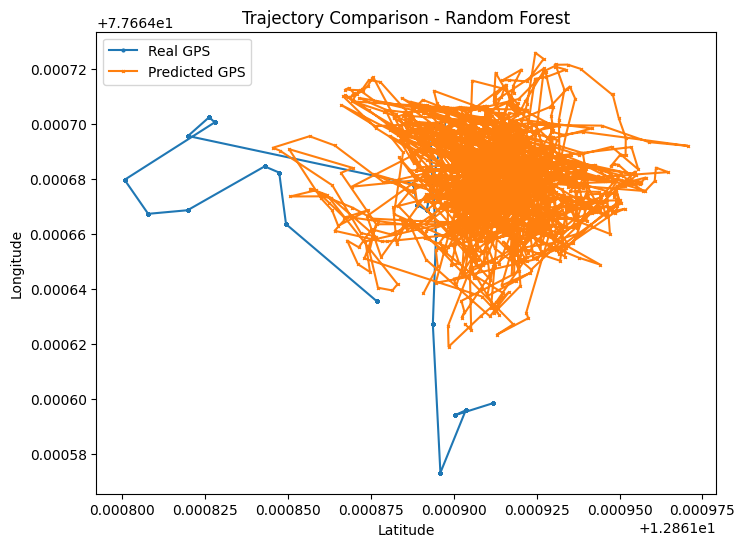

In [38]:
# --------------------
# Random Forest
# --------------------
rf = get_model("random_forest")
rf.fit(X_train_prep, y_train)
y_pred = rf.predict(X_test_prep)
results.append(evaluate_model(y_test, y_pred, "Random Forest"))
plot_trajectory(y_test, y_pred, "Random Forest")


=== Comparative Results ===
           model       RMSE        MAE            R2
0           LSTM   0.000475   0.000198 -1.592761e+02
1       CNN+LSTM   0.159804   0.120341 -1.793519e+07
2       LSTM+GRU  23.849174  16.863950 -3.977909e+11
3            SVR   0.000044   0.000031 -5.157100e-01
4  Random Forest   0.000055   0.000041 -1.356842e+00


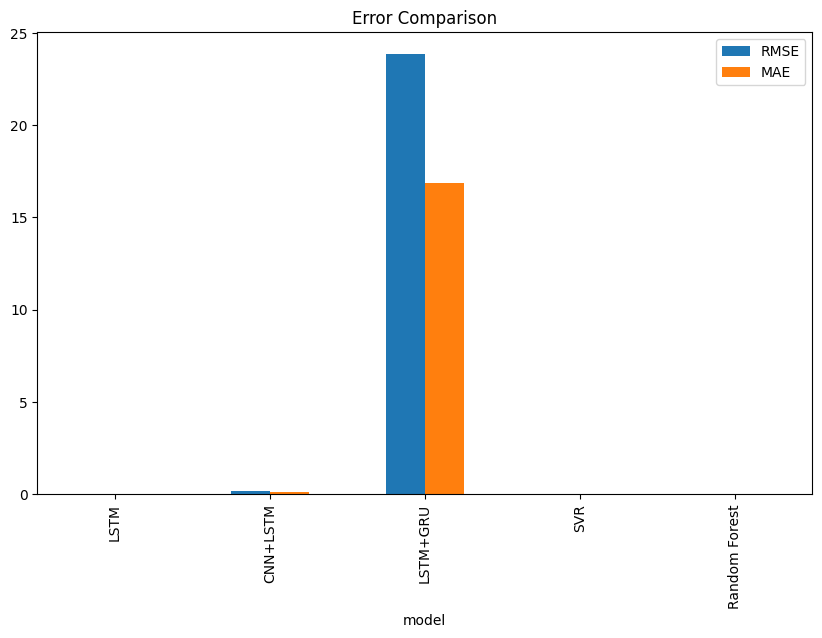

In [39]:
results_df = pd.DataFrame(results)
print("\n=== Comparative Results ===")
print(results_df)

results_df.plot(x="model", y=["RMSE", "MAE"], kind="bar", figsize=(10,6), title="Error Comparison")
plt.show()